# ًًQ1

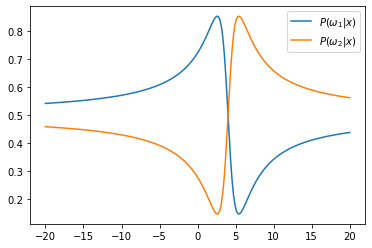

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x=np.linspace(-20,20,200)
pxw1=(1/np.pi)*1/(1+(x-3)**2)
pxw2=(1/np.pi)*1/(1+(x-5)**2)
px=(0.5/np.pi)*1/(1+(x-3)**2)+(0.5/np.pi)*1/(1+(x-5)**2)
pw1x=(0.5*pxw1)/px
pw2x=(0.5*pxw2)/px
plt.figure()
plt.plot(x,pw1x,label=r'$P(\omega_1|x)$')
plt.plot(x,pw2x,label=r'$P(\omega_2|x)$')
plt.legend();
plt.show();

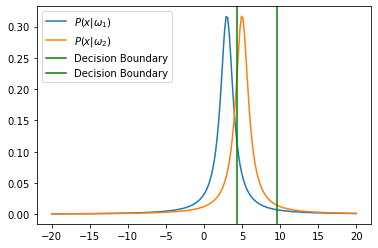

In [2]:
plt.figure()
plt.plot(x,pxw1,label=r'$P(x|\omega_1)$')
plt.plot(x,pxw2,label=r'$P(x|\omega_2)$')
plt.axvline(x = 9.64, color = 'g', label = 'Decision Boundary')
plt.axvline(x = 4.35, color = 'g', label = 'Decision Boundary')
plt.legend();
plt.show();

<h1>Q5</h1>

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('D:\دانشگاه تهران\ترم6\ML\HW1\Data\penguins.csv')
def preprocess(data):
    df = data.copy()
    value = df.drop(df.columns[0], axis=1, inplace=False)
    label = df[df.columns[0]]
    value = value.apply(lambda col: filling(col))
    value = normalize(value)
    return value, label

def filling(col):
    col = pd.to_numeric(col, errors='coerce').astype('float64')
    return col.fillna(col.mean())

def normalize(value):
    msc = MinMaxScaler()
    return pd.DataFrame(msc.fit_transform(value), columns=value.columns)

<h2> Manual</h2>

In [5]:
class NaiveBayes():
	def __init__(self, X, y):
		self.value = train_value
		self.label = train_label
		self.classes = np.unique(self.label)
		self.mean = np.zeros((len(self.classes), len(self.value.columns)))
		self.var = np.zeros((len(self.classes), len(self.value.columns)))
		self.prior = np.zeros((len(self.classes)))
	def train(self):
		self.calculate_mean()
		self.calculate_var()
		self.calculate_prior()
	def calculate_mean(self):
		for i,cls in enumerate(self.classes):
			for j,feature in enumerate(self.value.columns):
				self.mean[i][j] = self.value[self.label==cls][feature].mean(axis=0)
	def calculate_var(self):
		for i,cls in enumerate(self.classes):
			for j,feature in enumerate(self.value.columns):
				self.var[i][j] = self.value[self.label==cls][feature].var(axis=0)
	def calculate_prior(self):
		for i ,cls in enumerate(self.classes):
			self.prior[i]=sum(self.label==cls)/len(self.label)
	def predict(self, test_value, test_label):
		df = test_value.copy()
		df['y_pred'] = test_value.apply(lambda row: self.posterior(np.array(row)), axis=1)
		df = pd.concat([df, test_label], axis=1)
		return df
	def posterior(self,x):
		prob=[]
		for i,cls in enumerate(self.classes):
			post=np.sum(self.prior[i]*self.likelihood(i,x))
			prob.append(post)
		max_idx=np.argmax(prob)
		return self.classes[max_idx]
	def likelihood(self,cls_idx,x):
		mean,var=self.mean[cls_idx],self.var[cls_idx]
		prob=(np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi*var))
		return prob

<h3> Adelie</h3>

Accuracy= 85.4368932038835%
Recall= 84.90566037735849%
Percision= 86.53846153846153%


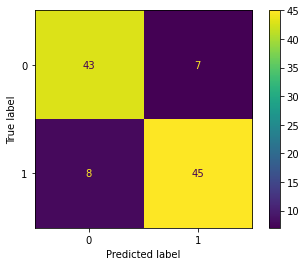

In [6]:
df_adelie = df.copy()
df_adelie['species'] = df['species'].replace(['Gentoo', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_adelie)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

<h3> Gentoo</h3>

Accuracy= 97.0873786407767%
Recall= 98.52941176470588%
Percision= 97.10144927536231%


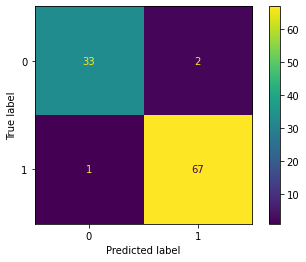

In [7]:
df_gentoo = df.copy()
df_gentoo['species'] = df['species'].replace(['Adelie', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_gentoo)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3,shuffle=True, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

<h3> Chinstrap</h3>

Accuracy= 82.52427184466019%
Recall= 100.0%
Percision= 82.52427184466019%


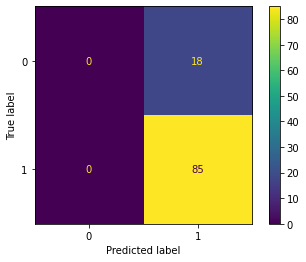

In [8]:
df_chinstrap = df.copy()
df_chinstrap['species'] = df['species'].replace(['Adelie', 'Gentoo'], 'Other', inplace=False)
value, label = preprocess(df_chinstrap)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3, random_state=42)
data = NaiveBayes(train_value, train_label)
data.train()
result = data.predict(test_value, test_label)

matrix=confusion_matrix(result['species'], result['y_pred'])
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

<h2> SKLEARN</h2>

<h3> Adelie</h3>

Accuracy= 91.2621359223301%
Recall= 94.33962264150944%
Percision= 89.28571428571429%


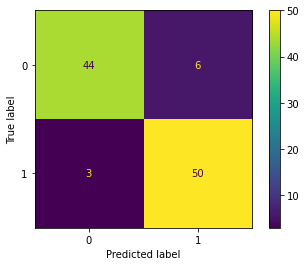

In [9]:
df_adelie = df.copy()
df_adelie['species'] = df['species'].replace(['Gentoo', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_adelie)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

<h3> Gentoo</h3>

Accuracy= 99.02912621359224%
Recall= 100.0%
Percision= 98.55072463768116%


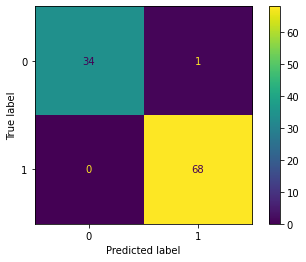

In [10]:
df_gentoo = df.copy()
df_gentoo['species'] = df['species'].replace(['Adelie', 'Chinstrap'], 'Other', inplace=False)
value, label = preprocess(df_gentoo)
train_value, test_value, train_label, test_label = train_test_split(value, label, test_size=0.3,shuffle=True, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

<h3> Chinstrap</h3>

Accuracy= 95.14563106796116%
Recall= 98.82352941176471%
Percision= 95.45454545454545%


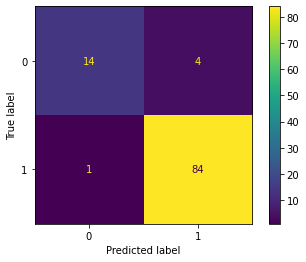

In [11]:
df_chinstrap = df.copy()
df_chinstrap['species'] = df['species'].replace(['Adelie', 'Gentoo'], 'Other', inplace=False)
value, label = preprocess(df_chinstrap)
train_value, test_value, train_label, test_label = train_test_split(value, label,shuffle=True, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(train_value, train_label).predict(test_value)
matrix=confusion_matrix(test_label,y_pred)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
print("Accuracy= " + str(100*matrix.trace()/np.sum(matrix)) + "%")
print("Recall= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[1][0])) + "%")
print("Percision= " + str(100*matrix[1][1]/(matrix[1][1]+matrix[0][1])) + "%")

# Q6

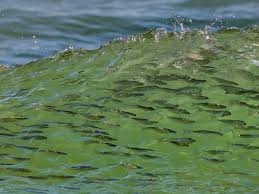

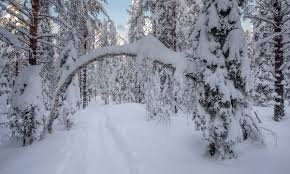

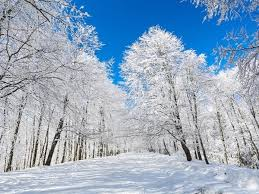

Accuracy= 96.34146341463415%
Recall= 95.1219512195122%
Percision= 0.975%


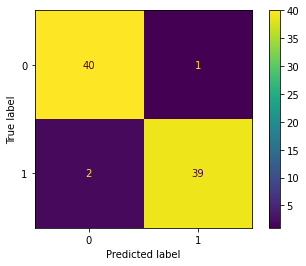

In [12]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image, display
def see_finder(image):
    r,g,b=np.mean(image,axis=(0,1))
    ans=0 if b<g else 1
    return ans

jungle=[]
sea=[]
for i in range(1,41):
	image=imageio.imread('image/s'+str(i)+'.jpg')
	predict=see_finder(image)
	if predict==0:
		display(Image(filename='image/s'+str(i)+'.jpg'))
	sea.append(predict)
for j in range(1,43):
	image=imageio.imread('image/j'+str(j)+'.jpg')
	predict=see_finder(image)
	if predict==1:
		display(Image(filename='image/j'+str(j)+'.jpg'))
	jungle.append(predict)
#target class is sea
TP=sea.count(1)
TN=jungle.count(0)
FP=sea.count(0)
FN=jungle.count(1)
cf_matrix=np.array([[TN,FP],[FN,TP]])
disp=ConfusionMatrixDisplay(cf_matrix)
disp.plot()
print("Accuracy= " + str(100*(TN+TP)/(TN+TP+FP+FN)) + "%")
print("Recall= " + str(100*TP/(TP+FN)) + "%")
print("Percision= " + str(TP/(TP+FP)) + "%")